# Random forest classifier for NMD prediction

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import matplotlib.pyplot as plt
import numpy as np

In [2]:
negative_df = pd.read_csv('negative_set_down_and_insign.csv', index_col = 0)
positive_df = pd.read_csv('long_read_sleuth_dKD_up_filtered_features.csv', index_col = 0)

In [3]:
#Label
negative_df['NMD_sensitivity'] = 0
positive_df['NMD_sensitivity'] = 1

In [4]:
negative_df.describe()

,start_ORF,end_ORF,exon_with_stop_length,last_exon_length,t_length,distance_stop_EJC,50_nt,stop_TGA,stop_TAA,3_UTR_length,...,4th_stop_G,4th_stop_T,GC_perc_30_bp_round_stop,GC_perc_up_15_bp_stop,GC_perc_down_15_bp_stop,nr_exons_in_transcript,nr_exons_in_3prime,UPF1_motifs_in3prime_total,UPF1_motifs_in3prime_relative,NMD_sensitivity
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,...,3274.000000,3274.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.0
mean,258.937843,1255.502742,1074.448507,1260.667276,2632.665448,116.495430,0.322364,0.532297,0.257465,1377.162706,...,0.304826,0.186011,0.478428,0.508755,0.448101,9.274528,2.656612,5.542048,0.004346,0.0
std,343.481490,1250.825830,1515.871895,1603.216657,2229.748535,850.397276,0.467453,0.499032,0.437304,1697.456839,...,0.460404,0.389175,0.131035,0.152329,0.155042,7.421265,3.693037,7.463835,0.004252,0.0
min,0.000000,62.000000,22.000000,8.000000,191.000000,-6874.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,81.000000,442.000000,188.250000,279.000000,984.000000,-156.750000,0.000000,0.000000,0.000000,324.000000,...,0.000000,0.000000,0.366667,0.400000,0.333333,4.000000,1.000000,1.000000,0.001591,0.0
50%,173.000000,855.500000,491.000000,669.000000,1996.500000,-61.000000,0.000000,1.000000,0.000000,771.000000,...,0.000000,0.000000,0.466667,0.533333,0.466667,7.000000,1.000000,3.000000,0.003586,0.0
75%,321.000000,1676.750000,1344.500000,1639.750000,3516.750000,207.750000,1.000000,1.000000,1.000000,1793.500000,...,1.000000,0.000000,0.566667,0.600000,0.533333,12.000000,3.000000,7.000000,0.006167,0.0
max,5424.000000,15984.000000,19780.000000,19780.000000,21679.000000,9578.000000,1.000000,1.000000,1.000000,19698.000000,...,1.000000,1.000000,0.866667,1.000000,0.866667,78.000000,41.000000,110.000000,0.071429,0.0


In [5]:
positive_df.describe()

,start_ORF,end_ORF,exon_with_stop_length,last_exon_length,t_length,distance_stop_EJC,50_nt,stop_TGA,stop_TAA,3_UTR_length,...,4th_stop_G,4th_stop_T,GC_perc_30_bp_round_stop,GC_perc_up_15_bp_stop,GC_perc_down_15_bp_stop,nr_exons_in_transcript,nr_exons_in_3prime,UPF1_motifs_in3prime_total,UPF1_motifs_in3prime_relative,NMD_sensitivity
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,...,3268.000000,3268.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.0
mean,213.706277,994.913772,444.546923,911.954601,2432.723339,525.854966,0.706886,0.564595,0.239793,1437.809567,...,0.266524,0.199510,0.473146,0.503047,0.443246,11.327544,5.370201,5.510055,0.004196,1.0
std,265.569371,1180.577516,931.297514,1380.634305,2102.036620,894.676115,0.455260,0.495886,0.427022,1660.265204,...,0.442209,0.399693,0.117005,0.145617,0.137770,8.649829,5.729640,6.693357,0.004026,0.0
min,0.000000,62.000000,22.000000,3.000000,265.000000,-6216.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.066667,0.066667,0.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,65.000000,358.250000,109.000000,163.000000,891.000000,-5.000000,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.400000,0.400000,0.333333,5.000000,1.000000,1.000000,0.001791,1.0
50%,143.000000,611.000000,163.000000,424.000000,1849.500000,290.500000,1.000000,1.000000,0.000000,881.500000,...,0.000000,0.000000,0.466667,0.533333,0.466667,9.000000,4.000000,3.000000,0.003488,1.0
75%,275.000000,1213.250000,344.000000,1143.000000,3199.750000,772.000000,1.000000,1.000000,0.000000,2005.250000,...,1.000000,0.000000,0.566667,0.600000,0.533333,15.000000,7.000000,8.000000,0.005778,1.0
max,5731.000000,15239.000000,23264.000000,23264.000000,25280.000000,10035.000000,1.000000,1.000000,1.000000,21633.000000,...,1.000000,1.000000,0.866667,0.933333,0.866667,105.000000,62.000000,64.000000,0.066667,1.0


In [6]:
NMD_features_df =pd.concat([negative_df, positive_df], axis=0, join='outer')
NMD_features_df.columns

Index(['name_tar', 'start_ORF', 'end_ORF', 'exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC', 'ORF_id', '50_nt',
       'stop_TGA', 'stop_TAA', '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 'stop_150bp_from_start', '4th_stop_C',
       '4th_stop_G', '4th_stop_T', 'GC_perc_30_bp_round_stop',
       'GC_perc_up_15_bp_stop', 'GC_perc_down_15_bp_stop',
       'nr_exons_in_transcript', 'nr_exons_in_3prime',
       'UPF1_motifs_in3prime_total', 'UPF1_motifs_in3prime_relative',
       'NMD_sensitivity'],
      dtype='object')

In [7]:
NMD_features_df.dropna(inplace=True)
X = NMD_features_df.drop(['name_tar',  'GC_perc_30_bp_round_stop', 
                           'ORF_id', 'NMD_sensitivity'], axis=1)
y = NMD_features_df['NMD_sensitivity']

X['start_ORF'] = X['start_ORF']/X['t_length']
X['end_ORF'] = X['end_ORF']/X['t_length']

#normlaize X
for variable in ['exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC',
       '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 
        'GC_perc_up_15_bp_stop', 'GC_perc_down_15_bp_stop',
       'nr_exons_in_transcript', 'nr_exons_in_3prime',
       'UPF1_motifs_in3prime_total' ]:
    X[variable]=(X[variable]-X[variable].mean())/X[variable].std()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Set baseline

In [8]:
#Baseline: better than 50nt rule alone
y_pred_50 = X_test.loc[y_test.index, "50_nt"]

accuracy = accuracy_score(y_test, y_pred_50)
print("Accuracy:", accuracy)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_50, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")


##X_train.drop(['50_nt'], axis=1, inplace = True)
#X_test.drop(['50_nt'], axis=1, inplace = True)

Accuracy: 0.6875477463712758
RMSE of the base model: 0.559


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


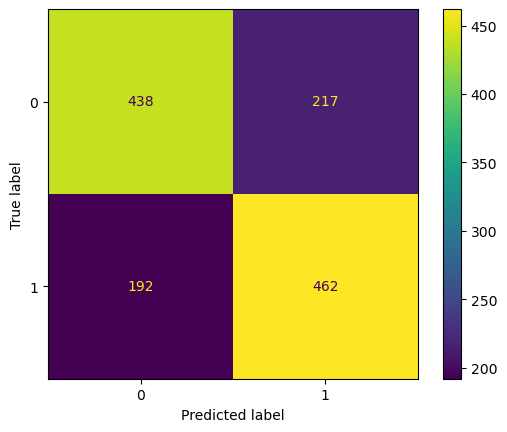

In [9]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_50)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Train the random forest

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

distance_stop_EJC                0.115755
exon_with_stop_length            0.102770
distance_stop_from_start         0.073278
start_ORF                        0.063774
end_ORF                          0.063157
t_length                         0.061673
last_exon_length                 0.060966
3_UTR_length                     0.060119
5_UTR_length                     0.059273
UPF1_motifs_in3prime_relative    0.053675
nr_exons_in_transcript           0.048077
nr_exons_in_3prime               0.046070
50_nt                            0.037805
GC_perc_up_15_bp_stop            0.037093
GC_perc_down_15_bp_stop          0.035092
UPF1_motifs_in3prime_total       0.031750
stop_TGA                         0.010107
stop_150bp_from_start            0.008154
stop_TAA                         0.008146
4th_stop_C                       0.008072
4th_stop_G                       0.007927
4th_stop_T                       0.007267
dtype: float64

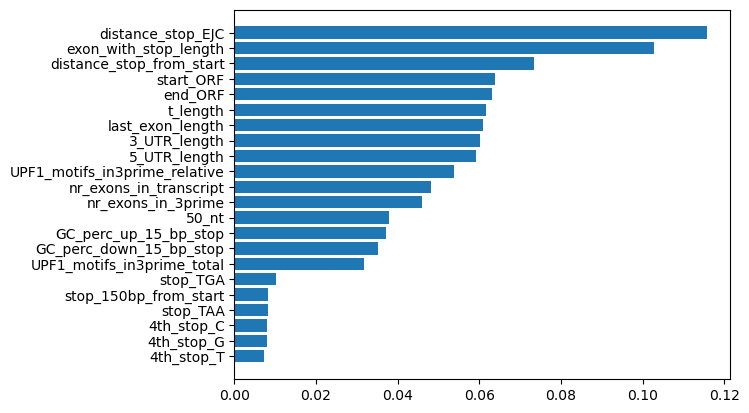

In [12]:
f_i = list(zip(tuple(X_train.columns),rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

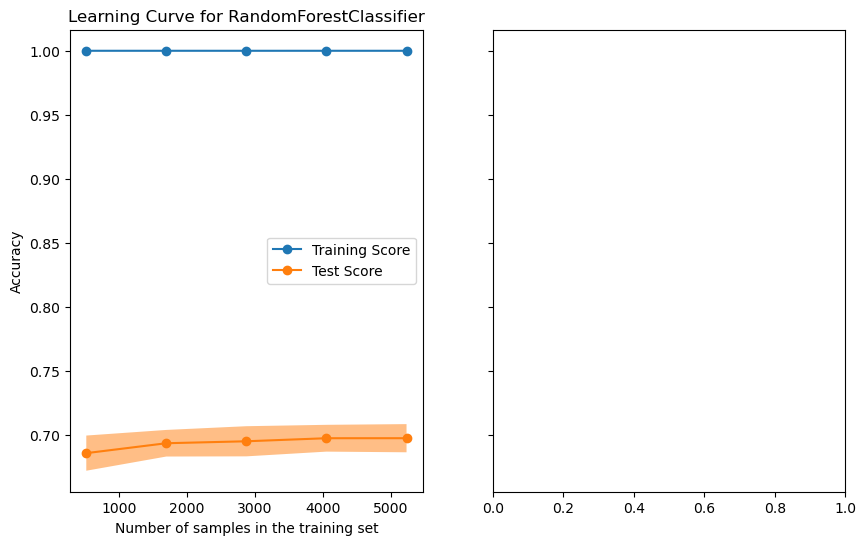

In [13]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html


from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [14]:
y_pred = rf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

Accuracy: 0.6776165011459129
RMSE of the base model: 0.568


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Feature selection

In [16]:
from sklearn.feature_selection import RFECV


#X_train = X_train.drop(['UPF1_motifs_in3prime_relative'], axis=1)
#X_test = X_test.drop(['UPF1_motifs_in3prime_relative'], axis=1)


rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

#reverse selection
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)
selected_features = np.array(X_train.columns)[rfe.get_support()]
selected_features

array(['start_ORF', 'end_ORF', 'exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC', '50_nt',
       'stop_TGA', 'stop_TAA', '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 'stop_150bp_from_start', '4th_stop_C',
       '4th_stop_G', '4th_stop_T', 'GC_perc_up_15_bp_stop',
       'GC_perc_down_15_bp_stop', 'nr_exons_in_transcript',
       'nr_exons_in_3prime', 'UPF1_motifs_in3prime_total',
       'UPF1_motifs_in3prime_relative'], dtype=object)

In [17]:
selected_features

array(['start_ORF', 'end_ORF', 'exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC', '50_nt',
       'stop_TGA', 'stop_TAA', '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 'stop_150bp_from_start', '4th_stop_C',
       '4th_stop_G', '4th_stop_T', 'GC_perc_up_15_bp_stop',
       'GC_perc_down_15_bp_stop', 'nr_exons_in_transcript',
       'nr_exons_in_3prime', 'UPF1_motifs_in3prime_total',
       'UPF1_motifs_in3prime_relative'], dtype=object)

In [18]:
#evaluation
X_train = X_train.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

Accuracy: 0.6944232238349886
RMSE of the base model: 0.553


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Hyperparameter tuning

In [19]:
param_dist = {'n_estimators': randint(200,500),
              'max_depth': randint(10,20), 
              'min_samples_split': randint(10,20),
              'max_features': ['sqrt', 'log2']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17c94a400>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10fb2aa60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10fb2afa0>})

In [20]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 17, 'n_estimators': 496}


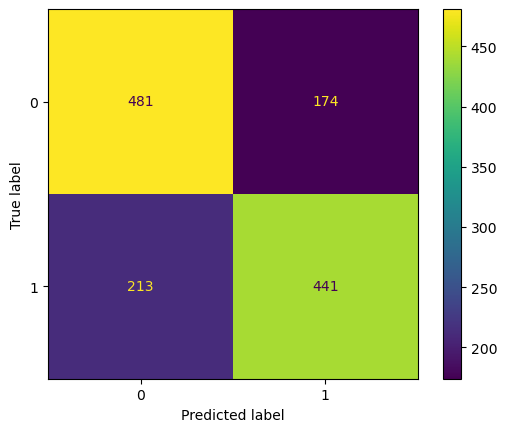

In [21]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7043544690603514


In [23]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.544


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Ensmembl learning

In [24]:
#xgboost
from xgboost import XGBClassifier
params  = {'learning_rate': 0.07630533654866012, 'max_depth': 4, 'n_estimators': 96, 'subsample': 0.7427598967900048}
xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07630533654866012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=96, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
#logreg
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predictions

#log reg
log_pred = log_reg.predict(X_test)
#xgboost
xgb_pred = xgb_model.predict(X_test)
#random forest
y_pred

#50nt rule
y_pred_50

In [48]:
ensembl_pred = round((log_pred + 3*xgb_pred + 5*y_pred + 5*y_pred_50) / 14)

accuracy = accuracy_score(y_test, ensembl_pred)
print("Accuracy:", accuracy)

rmse = mean_squared_error(y_test, ensembl_pred, squared = False)
print(f"RMSE of the base model: {rmse:.3f}")

Accuracy: 0.7074102368220015
RMSE of the base model: 0.541


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


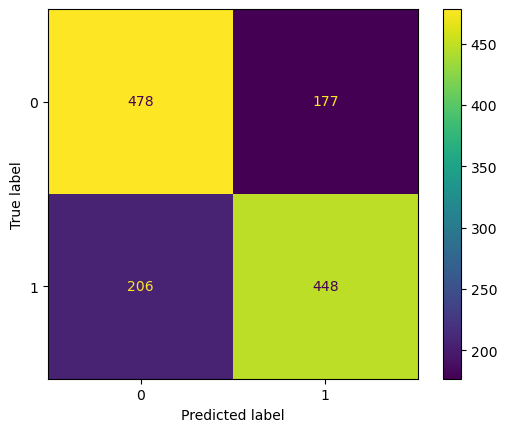

In [49]:
# Create the confusion matrix
cm = confusion_matrix(y_test, ensembl_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();